### Day 3 Exercises

**Economics data set analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe.
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data. Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following:
    i. dropping the rows with null values
    ii. Output data regularly to see if they are following regular format. Use pandas.series.pct_change/pandas.DataFrame.cumsum wherever necessary

5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.


**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Monthly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly           


In [1]:
#1 and 2
import pandas as pd
df_list = []
rel_path = '../data/economics/'
csv_list = !ls ../data/economics/
for csv_file in csv_list:
    print(csv_file)
    df = pd.read_csv(rel_path+csv_file).set_index('DATE')
    df.columns = [csv_file[:-4]]
    print(df.shape)
    df_list.append(df)

merged_df = pd.concat(df_list, axis=1)
print(merged_df.shape)
merged_df.head()

AAA.csv
(1149, 1)
BAA.csv
(1149, 1)
CPILFESL.csv
(693, 1)
GDPC1.csv
(270, 1)
GS1.csv
(738, 1)
GS10.csv
(738, 1)
INDPRO.csv
(1149, 1)
UNRATE.csv
(801, 1)
(1149, 8)


,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE
1919-01-01,5.35,7.12,NaN,NaN,NaN,NaN,4.8582,NaN
1919-02-01,5.35,7.20,NaN,NaN,NaN,NaN,4.6435,NaN
1919-03-01,5.39,7.15,NaN,NaN,NaN,NaN,4.5092,NaN
1919-04-01,5.44,7.23,NaN,NaN,NaN,NaN,4.5898,NaN
1919-05-01,5.39,7.09,NaN,NaN,NaN,NaN,4.6166,NaN


In [2]:
#3 - Term and Default premia series and mmerge the resulting series using JOIN operation
term_premium = merged_df['GS10'] - merged_df['GS1']
default_premium = merged_df['BAA'] - merged_df['AAA']
merged_df = merged_df.join(pd.DataFrame(term_premium, columns=['TERM_PREMIUM']))
merged_df = merged_df.join(pd.DataFrame(default_premium, columns=['DEFAULT_PREMIUM']))
print(merged_df.shape)
merged_df.tail()


(1149, 10)


,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,TERM_PREMIUM,DEFAULT_PREMIUM
2014-05-01,4.16,4.76,237.776,NaN,0.10,2.56,103.6619,6.3,2.46,0.60
2014-06-01,4.25,4.80,238.083,NaN,0.10,2.60,103.9503,6.1,2.50,0.55
2014-07-01,4.16,4.73,238.311,NaN,0.11,2.54,104.1916,6.2,2.43,0.57
2014-08-01,4.08,4.69,238.345,NaN,0.11,2.42,104.0187,6.1,2.31,0.61
2014-09-01,4.11,4.80,238.677,NaN,0.11,2.53,105.0728,5.9,2.42,0.69


In [3]:
# 4 processing the data
merged_df['GDPC1'].isnull().sum()
merged_df.dropna(inplace=True)
print(merged_df.shape)
merged_df.head()

(230, 10)


,AAA,BAA,CPILFESL,GDPC1,GS1,GS10,INDPRO,UNRATE,TERM_PREMIUM,DEFAULT_PREMIUM
1957-01-01,3.77,4.49,28.5,2854.5,3.37,3.46,21.9289,4.2,0.09,0.72
1957-04-01,3.67,4.44,28.8,2848.2,3.49,3.48,21.8215,3.9,-0.01,0.77
1957-07-01,3.99,4.73,29.0,2875.9,3.81,3.93,21.9289,4.2,0.12,0.74
1957-10-01,4.10,4.99,29.2,2846.4,4.01,3.97,21.4189,4.5,-0.04,0.89
1958-01-01,3.60,4.83,29.3,2772.7,2.65,3.09,20.1306,5.8,0.44,1.23


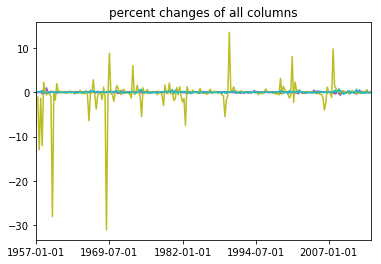

In [4]:
#Output data regularly to see if they are following regular format. Use 
#pandas.series.pct_change/pandas.DataFrame.cumsum wherever necessary
import matplotlib.pyplot as plt
%matplotlib inline

merged_df.pct_change().plot(legend=False, title='percent changes of all columns')

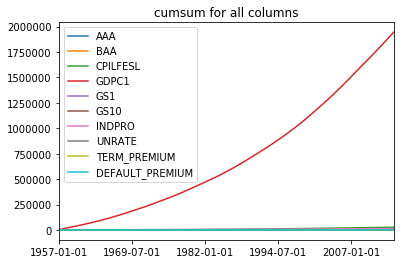

In [5]:
merged_df.cumsum().plot(title='cumsum for all columns')

In [6]:
# from plots above things look fairly consistent
merged_df.pct_change().mean()*100
#following is the average percent change per 3 month period

AAA                 0.195414
BAA                 0.157052
CPILFESL            0.931791
GDPC1               0.759810
GS1                -0.011355
GS10                0.313103
INDPRO              0.698319
UNRATE              0.375259
TERM_PREMIUM      -36.608537
DEFAULT_PREMIUM     1.326541
dtype: float64

In [7]:
merged_df.pct_change().max()*100
#following shows the max percent change over 3 month period

AAA                  16.353887
BAA                  24.022346
CPILFESL              3.650587
GDPC1                 3.887932
GS1                  98.136646
GS10                 46.590909
INDPRO                9.634065
UNRATE               35.000000
TERM_PREMIUM       1350.000000
DEFAULT_PREMIUM      74.496644
dtype: float64

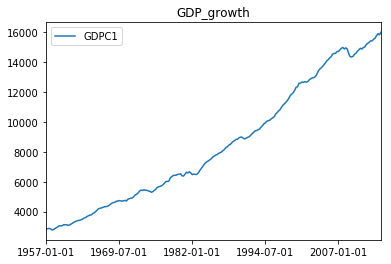

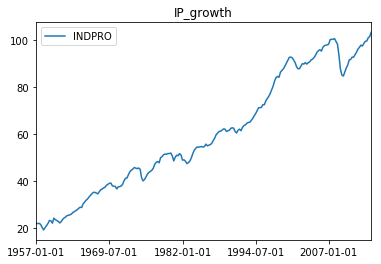

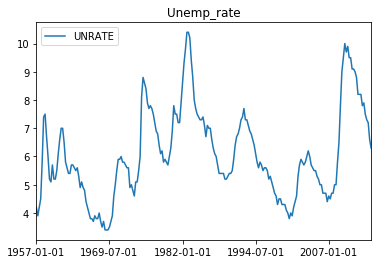

In [8]:
#5 - Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences
import matplotlib.pyplot as plt
%matplotlib inline

merged_df.plot(y='GDPC1', title='GDP_growth')
merged_df.plot(y='INDPRO', title='IP_growth')
merged_df.plot(y='UNRATE', title='Unemp_rate')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dafaa10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e1248d0>]], dtype=object)

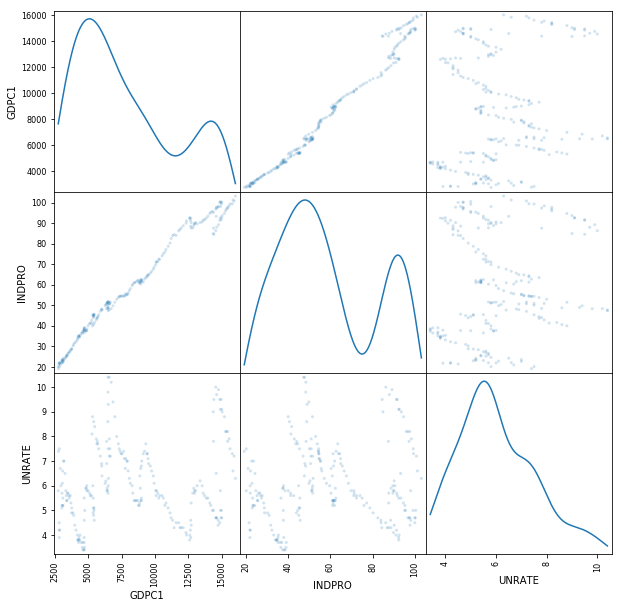

In [9]:
#6 - Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' 
# in a mmatrix form with kernel density plots along the diagonals.
from pandas.plotting import scatter_matrix

scatter_matrix(merged_df[['GDPC1', 'INDPRO', 'UNRATE']], alpha=0.2, figsize=(10, 10), diagonal='kde')

**Nutrition dataset analysis**

This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json

> db = json.load(open('../data/Nutrition/foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

In [3]:
import json
db = json.load(open('../data/Nutrition/foods-2011-10-03.json'))
#Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

In [4]:
#Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.
#meta_df = pd.DataFrame()
meta_list = []
for dic in db:
    meta_list.append([dic['description'], dic['group'], dic['id'], dic['manufacturer']] )
meta_df = pd.DataFrame(meta_list, columns=['description', 'group', 'id', 'manufacturer'])
print(meta_df.shape)
meta_df.tail(10)

(6636, 4)


,description,group,id,manufacturer
6626,"CAMPBELL Soup Company, V8 Vegetable Juice, Ess...",Vegetables and Vegetable Products,31010,Campbell Soup Co.
6627,"CAMPBELL Soup Company, V8 Vegetable Juice, Spi...",Vegetables and Vegetable Products,31013,Campbell Soup Co.
6628,"CAMPBELL Soup Company, PACE, Jalapenos Nacho S...",Vegetables and Vegetable Products,31014,Campbell Soup Co.
6629,"CAMPBELL Soup Company, V8 60% Vegetable Juice,...",Vegetables and Vegetable Products,31016,Campbell Soup Co.
6630,"CAMPBELL Soup Company, V8 Vegetable Juice, Low...",Vegetables and Vegetable Products,31017,Campbell Soup Co.
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None
6635,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None


In [5]:
#Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. 
#Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)
# need the 'description', 'group', 'units', 'value' and 'id'.
df_list = []
for dic in db:
    nutrient_list = []
    for nutrient in dic['nutrients']:
        nutrient_makeup = []
        nutrient_makeup.append(nutrient['description'])
        nutrient_makeup.append(nutrient['group'])
        nutrient_makeup.append(nutrient['units'])
        nutrient_makeup.append(nutrient['value'])
        nutrient_makeup.append(dic['id'])
        nutrient_list.append(nutrient_makeup)
    df = pd.DataFrame(nutrient_list, columns = ['description', 'group', 'units', 'value', 'id'])
    df_list.append(df)



In [6]:
df_list[0].head()

,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [7]:
# Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this 
# drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do
# nuts = nuts.drop_duplicates()
nutrients_df = pd.concat(df_list)
print(nutrients_df.shape)
nutrients_df = nutrients_df.drop_duplicates()
print(nutrients_df.shape)
nutrients_df.head()

(389355, 5)
(375176, 5)


,description,group,units,value,id
0,Protein,Composition,g,25.18,1008
1,Total lipid (fat),Composition,g,29.20,1008
2,"Carbohydrate, by difference",Composition,g,3.06,1008
3,Ash,Other,g,3.28,1008
4,Energy,Energy,kcal,376.00,1008


In [8]:
# Use the rename method to make sure that the description and group columns are un-ambiguous for both the 
# meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a 
# description and group and each nutrient also has those identifiers).
meta_df.rename(columns= {'description': 'food_description', 'group': 'food_group' }, inplace=True)
nutrients_df.rename(columns= {'description': 'nutrient_description', 'group': 'nutrients_group' }, inplace=True)
meta_df.tail()

,food_description,food_group,id,manufacturer
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None
6635,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None


In [9]:
nutrients_df.tail()

,nutrient_description,nutrients_group,units,value,id
45,"Vitamin B-12, added",Vitamins,mcg,0.000,43546
46,Cholesterol,Other,mg,0.000,43546
47,"Fatty acids, total saturated",Other,g,0.072,43546
48,"Fatty acids, total monounsaturated",Other,g,0.028,43546
49,"Fatty acids, total polyunsaturated",Other,g,0.041,43546


In [10]:
# Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and 
# nutritional information. Make sure to do an outer style merge on the correct columns.
print(meta_df.shape)
print(nutrients_df.shape)
foods_df = pd.merge(meta_df, nutrients_df, how='outer', on='id')
print(foods_df.shape)
foods_df.tail()

(6636, 4)
(375176, 5)
(375176, 8)


,food_description,food_group,id,manufacturer,nutrient_description,nutrients_group,units,value
375171,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None,"Vitamin B-12, added",Vitamins,mcg,0.000
375172,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None,Cholesterol,Other,mg,0.000
375173,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None,"Fatty acids, total saturated",Other,g,0.072
375174,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None,"Fatty acids, total monounsaturated",Other,g,0.028
375175,"Babyfood, banana no tapioca, strained",Baby Foods,43546,None,"Fatty acids, total polyunsaturated",Other,g,0.041


In [11]:
# The food item with the highest content of each nutrient.
nutr_grpby = foods_df.groupby(['nutrient_description','units']).max().reset_index().loc[:,['nutrient_description','units','value']]
pd.merge(foods_df, nutr_grpby, left_on=['nutrient_description', 'units', 'value'], 
         right_on=['nutrient_description', 'units', 'value'])

,food_description,food_group,id,manufacturer,nutrient_description,nutrients_group,units,value
0,"Spices, paprika",Spices and Herbs,2028,,"Cryptoxanthin, beta",Vitamins,mcg,6186.000
1,"Spices, sage, ground",Spices and Herbs,2038,,Vitamin K (phylloquinone),Vitamins,mcg,1714.500
2,"Infant formula, MEAD JOHNSON, ENFAMIL, with ir...",Baby Foods,3805,None,Lactose,Sugars,g,56.000
3,"Infant formula, MEAD JOHNSON, ENFAMIL, LIPIL, ...",Baby Foods,3808,None,Lactose,Sugars,g,56.000
4,"Infant formula, MEAD JOHNSON, ENFAMIL, low iro...",Baby Foods,3809,None,Lactose,Sugars,g,56.000
5,"Infant formula, MEAD JOHNSON, ENFAMIL, LIPIL, ...",Baby Foods,3817,None,Lactose,Sugars,g,56.000
6,"Infant formula, MEAD JOHNSON, ENFAMIL, LACTOFR...",Baby Foods,3869,None,Glucose (dextrose),Sugars,g,57.000
7,"Salad dressing, russian dressing, low calorie",Fats and Oils,2066,,"Iron, Fe",Elements,mg,87.470
8,"Oil, wheat germ",Fats and Oils,4038,,Total lipid (fat),Composition,g,100.000
9,"Oil, sesame, salad or cooking",Fats and Oils,4058,,Total lipid (fat),Composition,g,100.000


In [12]:
nutr_grpby

,nutrient_description,units,value
0,Adjusted Protein,g,12.900
1,Alanine,g,8.009
2,"Alcohol, ethyl",g,42.500
3,Arginine,g,7.436
4,Ash,g,72.500
5,Aspartic acid,g,10.203
6,Beta-sitosterol,mg,426.000
7,Betaine,mg,630.400
8,Caffeine,mg,3680.000
9,"Calcium, Ca",mg,7364.000


### Note: Food Item missing. (-0.5)

In [19]:
# The food item with the highest content of each nutrient.
# nutrmax_df = foods_df.groupby('nutrient_description').max().loc[:,['units','value']].reset_index()
# pd.merge(foods_df, nutrmax_df, left_on=['nutrient_description', 'units', 'value'], 
#          right_on=['nutrient_description', 'units', 'value'])

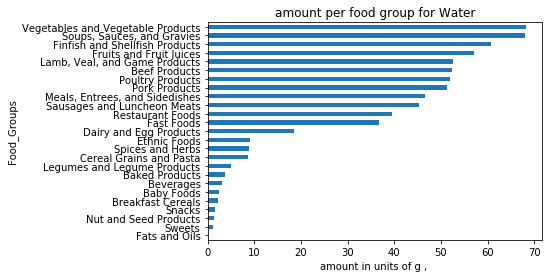

In [20]:
#A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of 
# the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile 
# and sort (or order ) methods in order for this to work.
def plot_nutrients(name, quantile):
    unit_tmp = foods_df[foods_df['nutrient_description'] == name]['units'].unique()
    units = ''
    for unit in unit_tmp:
        units += unit + ' , '
        
    grouped = foods_df.groupby(['nutrient_description', 'food_group'])
    result = grouped['value'].quantile(quantile)
    
    ax = result[name].sort_values().plot(kind='barh', title='amount per food group for {0}'.format(name))
    ax.set_ylabel('Food_Groups')
    ax.set_xlabel('amount in units of {0}'.format(units))
    
plot_nutrients('Water', .1)

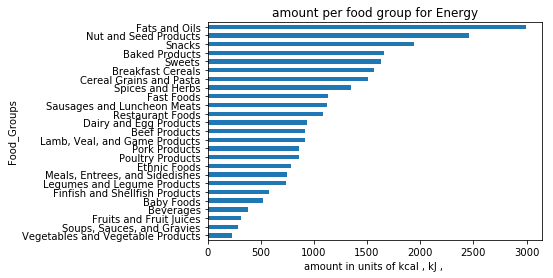

In [21]:
plot_nutrients('Energy', .8)

**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

And the images can be visualized as follows

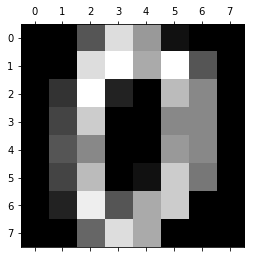

In [23]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[0]) 
pl.show() 

Visualize the first 15 digits to get a better understanding of the data

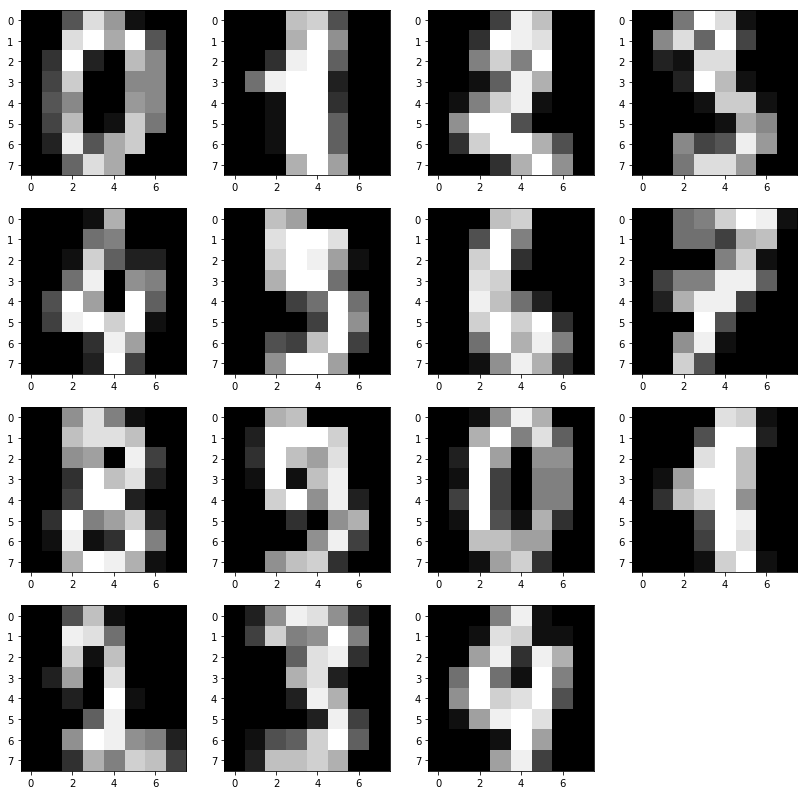

In [24]:
fig = plt.figure(1, figsize=(14, 14))
for i in range(0,15):
    ax = fig.add_subplot(4,4,i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray)
    
plt.show()

**Dimensionality Reduction - PCA**

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. 

Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
Use the sklearn inbuilt tool sklearn.decomposition.PCA

Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the amount of information thrown away and plot the variance(cumulative) against the number of components  

In [25]:
# Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
# Use the sklearn inbuilt tool sklearn.decomposition.PCA
# Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze 
# the amount of information thrown away and plot the variance(cumulative) against the number of components
#print the shape before and after the PCA
print "Before : {0}".format(str(digits.data.shape))
from sklearn.decomposition import PCA
#K=64
pca = PCA()
pca.fit(digits.data)
T=pca.transform(digits.data)
print "After: {0}".format(str(T.shape))


Before : (1797, 64)
After: (1797, 64)


Populating the interactive namespace from numpy and matplotlib
[  1.48905936e-01   1.36187712e-01   1.17945938e-01   8.40997942e-02
   5.78241466e-02   4.91691032e-02   4.31598701e-02   3.66137258e-02
   3.35324810e-02   3.07880621e-02   2.37234084e-02   2.27269657e-02
   1.82186331e-02   1.77385494e-02   1.46710109e-02   1.40971560e-02
   1.31858920e-02   1.24813782e-02   1.01771796e-02   9.05617439e-03
   8.89538461e-03   7.97123157e-03   7.67493255e-03   7.22903569e-03
   6.95888851e-03   5.96081458e-03   5.75614688e-03   5.15157582e-03
   4.89539777e-03   4.28887968e-03   3.73606048e-03   3.53274223e-03
   3.36683986e-03   3.28029851e-03   3.08320884e-03   2.93778629e-03
   2.56588609e-03   2.27742397e-03   2.22277922e-03   2.11430393e-03
   1.89909062e-03   1.58652907e-03   1.51159934e-03   1.40578764e-03
   1.16622290e-03   1.07492521e-03   9.64053065e-04   7.74630271e-04
   5.57211553e-04   4.04330693e-04   2.09916327e-04   8.24797098e-05
   5.25149980e-05   5.05243719e-05   3.2

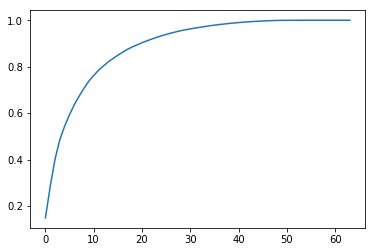

In [26]:

import numpy as np
%pylab inline
print pca.explained_variance_ratio_
plot(cumsum(pca.explained_variance_ratio_))

In [27]:
# taking a peek at the cdf for explained variance ratio at index 40, we see that the first 40 features accounts for 99%
# of the explained variance
cumsum(pca.explained_variance_ratio_)[40]

0.99010182427955484

so if we reduce pca to 41 features we are only throwing away 1% of the variance

In [28]:
# so now lets try creating a pca which reduces to 41 features from 64
print "Before : {0}".format(str(digits.data.shape))
from sklearn.decomposition import PCA
K=41
pca2 = PCA(n_components=K)
pca2.fit(digits.data)
T2=pca2.transform(digits.data)
print "After: {0}".format(str(T2.shape))

Before : (1797, 64)
After: (1797, 41)


Populating the interactive namespace from numpy and matplotlib
[ 0.14890594  0.13618771  0.11794594  0.08409979  0.05782415  0.0491691
  0.04315987  0.03661373  0.03353248  0.03078806  0.02372341  0.02272697
  0.01821863  0.01773855  0.01467101  0.01409716  0.01318589  0.01248138
  0.01017718  0.00905617  0.00889538  0.00797123  0.00767493  0.00722904
  0.00695889  0.00596081  0.00575615  0.00515158  0.0048954   0.00428888
  0.00373606  0.00353274  0.00336684  0.0032803   0.00308321  0.00293779
  0.00256589  0.00227742  0.00222278  0.0021143   0.00189909]


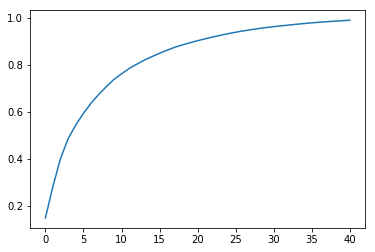

In [29]:
%pylab inline
print pca2.explained_variance_ratio_
plot(cumsum(pca2.explained_variance_ratio_))

Extra: Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA  as well 
(this extended analysis need not be submitted as part of homework)

# Total = 14.5